In [50]:
import numpy as np
import nibabel as nib
import cv2
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
import random

def plot_random_xy(test_image, test_mask):
    n_slice=random.randint(0, test_image.shape[2])

    plt.figure(figsize=(12, 8))
    plt.subplot(1,2,1)
    plt.imshow(test_image[:,:,n_slice], cmap='gray')
    plt.title('Image')
    plt.subplot(1,2,2)
    plt.imshow(test_mask[:,:,n_slice])
    plt.title('Mask')
    plt.show()

In [5]:
def plot_xy(test_image, test_mask, n_slice):
    plt.figure(figsize=(12, 8))
    plt.subplot(1,2,1)
    plt.imshow(test_image[:,:,n_slice], cmap='gray')
    plt.title('Image')
    plt.subplot(1,2,2)
    plt.imshow(test_mask[:,:,n_slice])
    plt.title('Mask')
    plt.show()

In [6]:
def resize_interpolate(image_3d, interpolation):
    # print("image_3d.shape[2] ", type(image_3d.shape[2]))
    temp_3d = np.full((int(image_3d.shape[0]/2), int(image_3d.shape[1]/2), image_3d.shape[2]), 0, dtype=image_3d.dtype)
    for idx in range(image_3d.shape[2]):
        # print(idx)
        temp_2d = image_3d[:,:,idx]
        # print("temp_2d.shape ", temp_2d.shape)
        temp_2d = cv2.resize(temp_2d, None, fx=0.5, fy=0.5, interpolation=interpolation)  # cv2.INTER_CUBIC
        # print("temp_2d.shape ", temp_2d.shape)
        temp_3d[:,:,idx] = temp_2d
        # print("temp_3d.shape ", temp_3d.shape)
    return temp_3d

In [7]:
from scipy.ndimage import zoom

def resize_interpolate_zoom(array, mode):
    new_array = zoom(array, (0.125, 0.125, 0.25), mode=mode)
    return new_array

In [8]:
# IMAGE
# Part to test data to get more familiar
TRAIN_DATASET_PATH = r'E:\Task03_Liver\\'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image=nib.load(TRAIN_DATASET_PATH + r'test_in\liver_5_flair.nii.gz').get_fdata()
print(test_image.max())

# print(test_image.shape)
test_image = test_image[:,:,272:528]
# print(test_image.shape)
# test_image = resize_interpolate(test_image.astype(np.float32))
test_image  = resize_interpolate_zoom(test_image.astype(np.float32), 'constant')
print("resize_interpolate_zoom dtype", test_image.dtype)
print("resize_interpolate_zoom shape", test_image.shape)

#np.set_printoptions(threshold=np.inf)

#Scalers are applied to 1D so let us reshape and then reshape back to original shape.
basic_shape = test_image.shape
test_image=scaler.fit_transform(test_image.reshape(-1, test_image.shape[-1])).reshape(test_image.shape)
print("fit_transform ", test_image.shape, test_image.dtype)
# print(test_image)


1645.0
resize_interpolate_zoom dtype float32
resize_interpolate_zoom shape (128, 128, 128)
fit_transform  (128, 128, 128) float32


In [9]:
# MASK
test_mask=nib.load(TRAIN_DATASET_PATH + r'test_in\liver_5_seg.nii.gz').get_fdata()
test_mask = test_mask[:,:,272:528]
# test_mask=test_mask.astype(np.uint8)

# test_mask = resize_interpolate(test_mask)
test_mask  = resize_interpolate_zoom(test_mask.astype(np.float32), 'constant')

# save_mask = open(TRAIN_DATASET_PATH + "test_mask_file.txt", 'w')
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask = np.around(test_mask)
len_uniq = np.unique(test_mask)
print(len_uniq)
# save_mask.write(str(test_mask))
test_mask = to_categorical(test_mask, num_classes=3) # 3 because 0, 1, 2 in mask - 3 different values
# test_mask=test_mask.astype(np.uint8)
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)

[-0.3608524  -0.3204313  -0.30056354 ...  2.1228304   2.1638248
  2.2103217 ]
[0. 1. 2.]
[0. 1.]


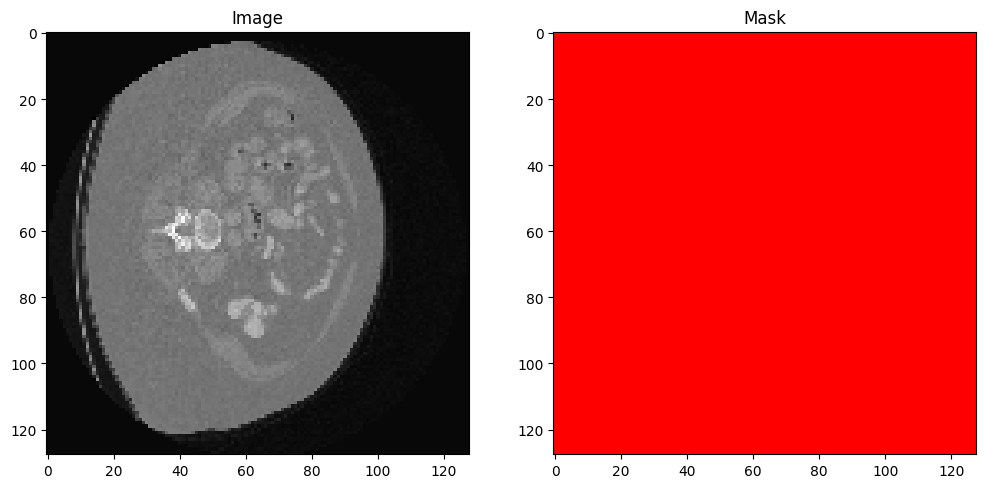

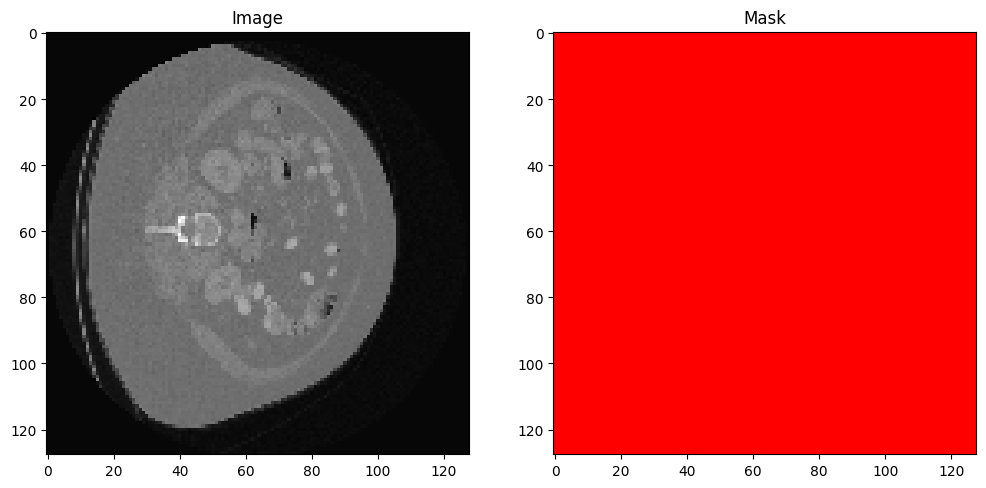

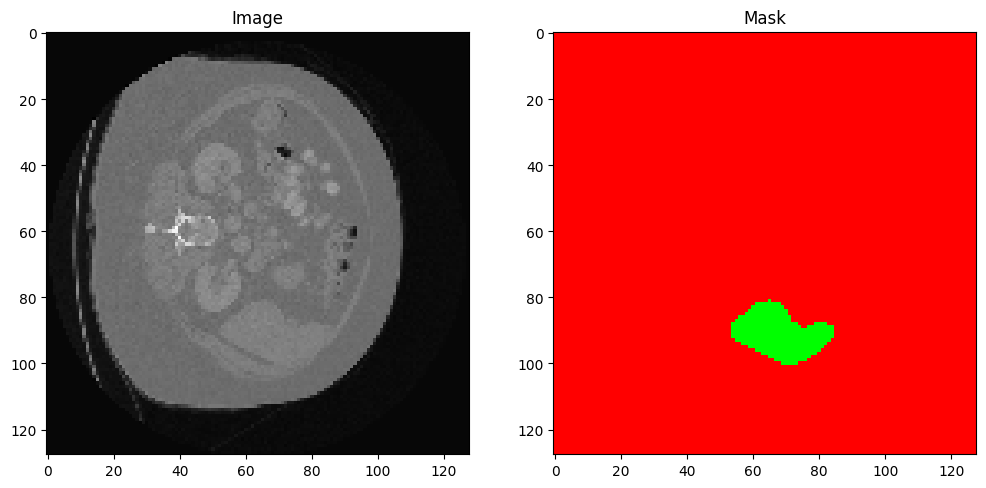

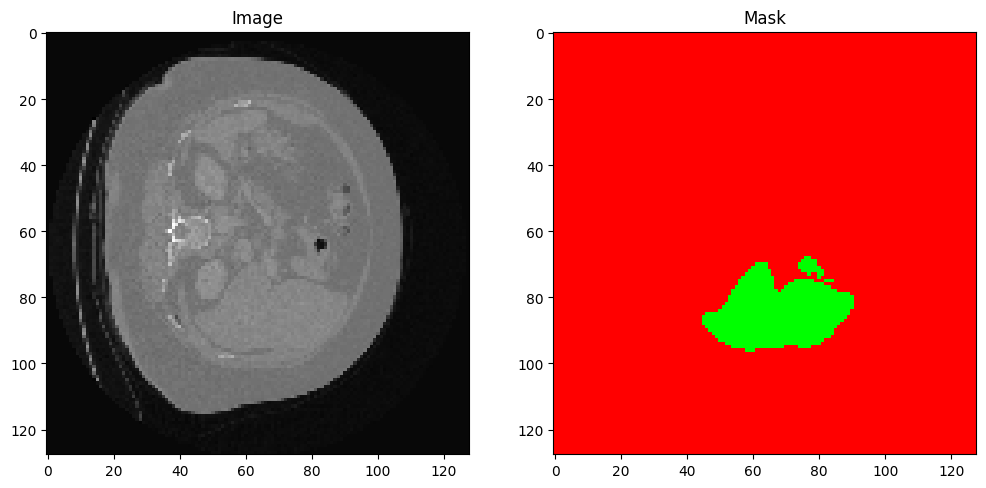

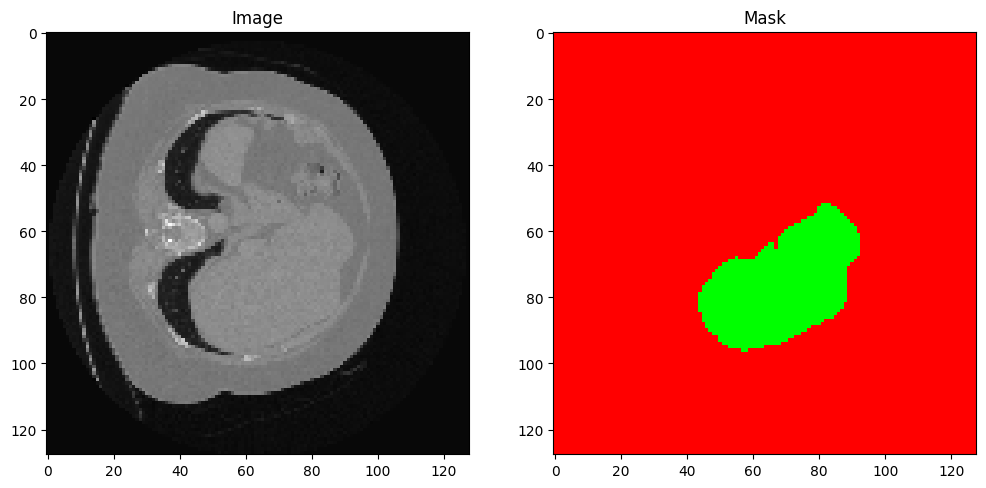

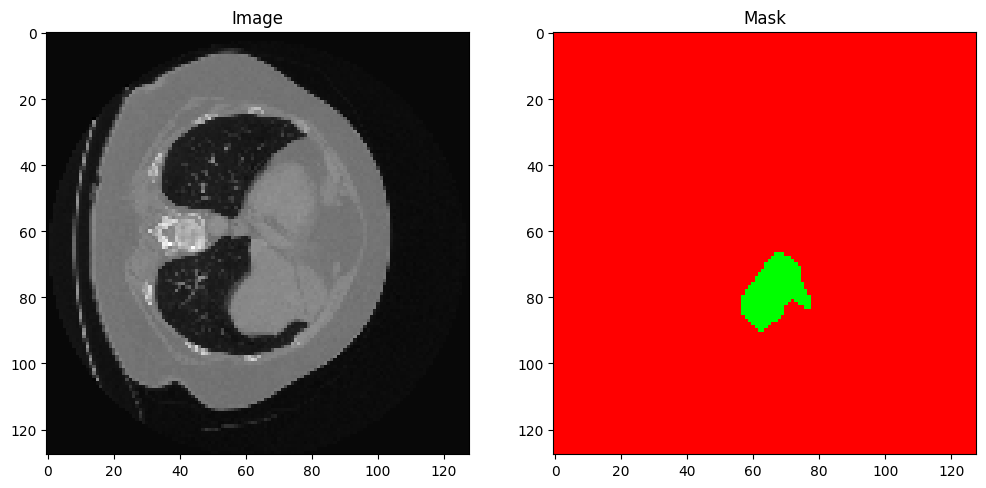

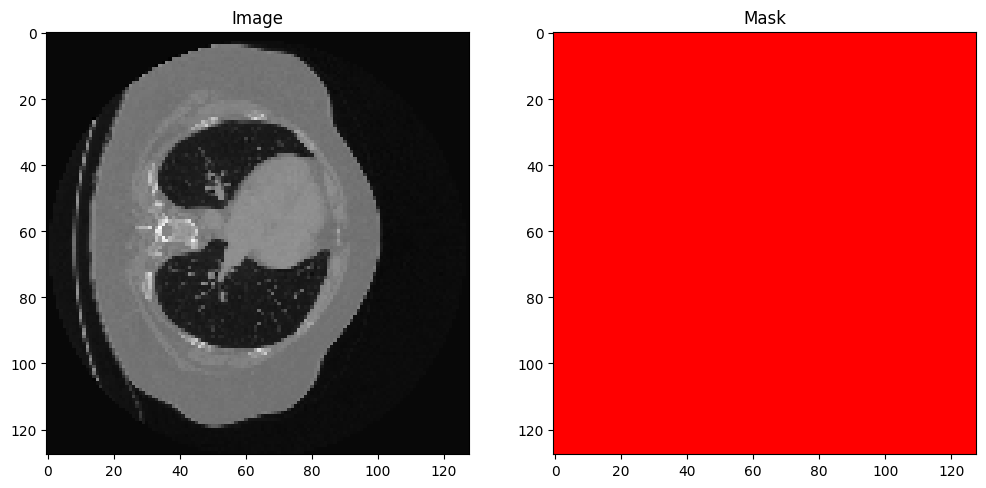

In [30]:
for idx in range(0, test_image.shape[0], 20):
    plot_xy(test_image, test_mask, idx)

In [29]:
################################################
#Flair, T1CE, annd T2 have the most information
np.set_printoptions(threshold=0)


print(test_image.shape)
print(test_mask.shape)
# print(test_image)
print(test_image.ndim)

# test_image=test_image[56:184, 56:184, 13:141] #Crop to 128x128x128x4

print(test_image.ndim)
#Do the same for mask
# test_mask = test_mask[56:184, 56:184, 13:141]



(512, 512, 537)
(512, 512, 537)
3
3


In [30]:
import time

# n_slice=random.randint(0, test_mask.shape[2])
# fig = plt.figure(figsize=(12, 8))
#
# for idx in range(0, test_image.shape[2], 5):
#     print("idx ", idx)
#     plt.subplot(121)
#     plt.imshow(test_image[:,:,idx], cmap='gray')
#     plt.title('Image flair')
#     plt.subplot(122)
#     plt.imshow(test_mask[:,:,idx])
#     plt.title('Mask')
#     plt.show()
#     fig.clf()

In [54]:
# Proper data processing starts here
# Part of the data processing

import pprint
all_livers = glob.glob(r'E:\Task03_Liver\ML_Liver\imagesTr\*.nii.gz')
mask_list = glob.glob(r'E:\Task03_Liver\ML_Liver\labelsTr\*.nii.gz')
pprint.pprint(all_livers)

pprint.pprint(mask_list)
print("mask len ", len(mask_list))
print("all_livers length ", len(all_livers))

['E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_0.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_1.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_10.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_100.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_101.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_102.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_103.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_104.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_105.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_106.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_107.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_108.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_109.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_11.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_110.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_111.nii.gz',
 'E:\\Task03_Liver\\ML_Liver\\imagesTr\\liver_112.nii.gz',
 'E

In [52]:
def resize_interpolate(image_3d, interpolation):
    print("resize_interpolate function")
    # print("image_3d.shape[2] ", type(image_3d.shape[2]))
    temp_3d = np.full((int(image_3d.shape[0]/2), int(image_3d.shape[1]/2), image_3d.shape[2]), 0, dtype=image_3d.dtype)
    for idx in range(image_3d.shape[2]):
        # print(idx)
        temp_2d = image_3d[:,:,idx]
        # print("temp_2d.shape ", temp_2d.shape)
        temp_2d = cv2.resize(temp_2d, None, fx=0.5, fy=0.5, interpolation=interpolation)  # cv2.INTER_CUBIC
        # print("temp_2d.shape ", temp_2d.shape)
        temp_3d[:,:,idx] = temp_2d
        # print("temp_3d.shape ", temp_3d.shape)
    return temp_3d


In [55]:
#Each volume generates 18 64x64x64x4 sub-volumes.
#Total 369 volumes = 6642 sub volumes


list_all = list()
list_out_of_bond_mask =list()
list_temp_image_shape = []
list_temp_mask_shape = []
# len(all_livers)
for img_idx in range(0, len(all_livers)):   #Using t1_list as all lists are of same size

    print("\n\n")
    print("Now preparing image and mask number: ", img_idx)

    temp_image=nib.load(all_livers[img_idx]).get_fdata()

    temp_image=scaler.fit_transform(temp_image.reshape(-1, temp_image.shape[-1])).reshape(temp_image.shape)

    temp_mask=nib.load(mask_list[img_idx]).get_fdata()



    # temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    shape = temp_image.shape
    print("shape before resizing ", shape)

    # first condition which dataset remove, in this scenario length < 128 in "z" direction
    if shape[2] > 256:  # 127:  # divide in 128 e lements blocks along z axis
        print("Accepted size of the sample, z dimension bigger than 128")
        list_all.append(shape[2])
        # print(test_mask.shape)
        size_beg = 10
        size_end = 490
        if shape[2] <= 528:
            temp_image = temp_image[:,:,shape[2]-256:]
            temp_mask = temp_mask[:,:,shape[2]-256:]
        else:
            temp_image = temp_image[:,:,272:528]
            temp_mask = temp_mask[:,:,272:528]
        print("shape after cutting", temp_image.shape, temp_mask.shape)

        #add scaler here
        print("Scaling process")
        print("temp_image before resize dtype, shape", temp_image.dtype, temp_image.shape)
        temp_image = resize_interpolate(temp_image.astype(np.float32), cv2.INTER_CUBIC)
        # temp_image  = resize_interpolate_zoom(temp_image.astype(np.float32), 'constant')
        print("temp_image after resize dtype, shape ", temp_image.dtype, temp_image.shape)

        # temp_mask = temp_mask.astype(np.uint8)
        print("temp_mask before resize dtype, shape ", temp_mask.dtype, temp_mask.shape)
        temp_mask = resize_interpolate(temp_mask.astype(np.float32), cv2.INTER_LINEAR)
        # temp_mask  = resize_interpolate_zoom(temp_mask.astype(np.float32), 'nearest')
        print("temp_mask after resize dtype, shape ", temp_mask.dtype, temp_mask.shape)
        print("temp_mask unique", np.unique(temp_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
        temp_mask = np.where(temp_mask>0, np.floor(temp_mask), np.ceil(temp_mask))
        temp_mask += 0  # removing -0
        # temp_mask = np.ceil(temp_mask<0)
        len_uniq = np.unique(temp_mask)
        print("temp_mask after rounding unique, shape, dtype", len_uniq, temp_mask.shape, temp_mask.dtype)

        # print("temp_mask ", temp_mask)
        print(np.unique(temp_mask))
        if len(np.unique(temp_mask)) > 3:
            print("Bigger number of masks in: ", img_idx)
            list_out_of_bond_mask.append(img_idx)
        ##second condition which dataset remove, surface of mask smaller than 1% of the sample
        val, counts = np.unique(temp_mask, return_counts=True)
        if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
            print("Save Me")
            temp_mask= to_categorical(temp_mask, num_classes=3) # 3 because 0, 1, 2 in mask - 3 different values
            # temp_mask = temp_mask.astype(np.uint8)
            # print(temp_mask)
            print("image temp  image to be saved ", temp_image.shape)
            print("image temp mask to be saved ", temp_mask.shape)
            list_temp_image_shape.append(temp_image.shape)
            list_temp_mask_shape.append(temp_mask.shape)

            np.save('E:\Task03_Liver\ML_Liver\input_data\images/image_'+str(img_idx)+'.npy', temp_image)
            np.save('E:\Task03_Liver\ML_Liver\input_data\masks/mask_'+str(img_idx)+'.npy', temp_mask)
        else:
            print("I am useless")

        # fig = plt.figure(figsize=(12, 8))
        # for idx in range(0, temp_image.shape[2], 5):
        #     print("idx ", idx)
        #     plt.subplot(121)
        #     plt.imshow(temp_image[:,:,idx], cmap='gray')
        #     plt.title('Image flair')
        #     plt.subplot(122)
        #     plt.imshow(temp_mask[:,:,idx])
        #     plt.title('Mask')
        #     plt.show()
        #     fig.clf()
        #     break

list_all.sort()
print(list_all)
print("Number of exceeded shapes of mask", "\n", list_out_of_bond_mask)





Now preparing image and mask number:  0
shape before resizing  (512, 512, 75)



Now preparing image and mask number:  1
shape before resizing  (512, 512, 123)



Now preparing image and mask number:  2
shape before resizing  (512, 512, 501)
Accepted size of the sample, z dimension bigger than 128
shape after cutting (512, 512, 256) (512, 512, 256)
Scaling process
temp_image before resize dtype, shape float64 (512, 512, 256)
resize_interpolate function
temp_image after resize dtype, shape  float32 (256, 256, 256)
temp_mask before resize dtype, shape  float64 (512, 512, 256)
resize_interpolate function
temp_mask after resize dtype, shape  float32 (256, 256, 256)
temp_mask unique [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
temp_mask after rounding unique, shape, dtype [0. 1. 2.] (256, 256, 256) float32
[0. 1. 2.]
Save Me
image temp  image to be saved  (256, 256, 256)
image temp mask to be saved  (256, 256, 256, 3)



Now preparing image and mask number:  3
shape before resizing  (5

In [58]:
img_lst = np.array(list_temp_image_shape)

mask_lst = np.array(list_temp_mask_shape)

print(img_lst)
print(mask_lst)


[[256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 256]
 [256 256 

In [ ]:
# FOR TESTS print what exceeds mask
for img_idx in range(0, 10):
    print(f"mask_list[{img_idx}] ", mask_list[img_idx])
    temp_mask=nib.load(mask_list[img_idx]).get_fdata()
    # temp_mask = resize_interpolate(temp_mask, cv2.INTER_LINEAR)
    temp_mask  = resize_interpolate_zoom(temp_mask.astype(np.float32), 'constant')

    temp_mask = np.around(temp_mask)
    len_uniq = np.unique(temp_mask)
    print("len(np.unique(temp_mask)) ", len(len_uniq))
    print(len_uniq)


In [57]:
import splitfolders  # or import split_folders

input_folder = r"E:\Task03_Liver\ML_Liver\input_data\\"
output_folder = r'E:\Task03_Liver\ML_Liver\splitted\\'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

(256, 256, 256)
(256, 256, 256, 3)


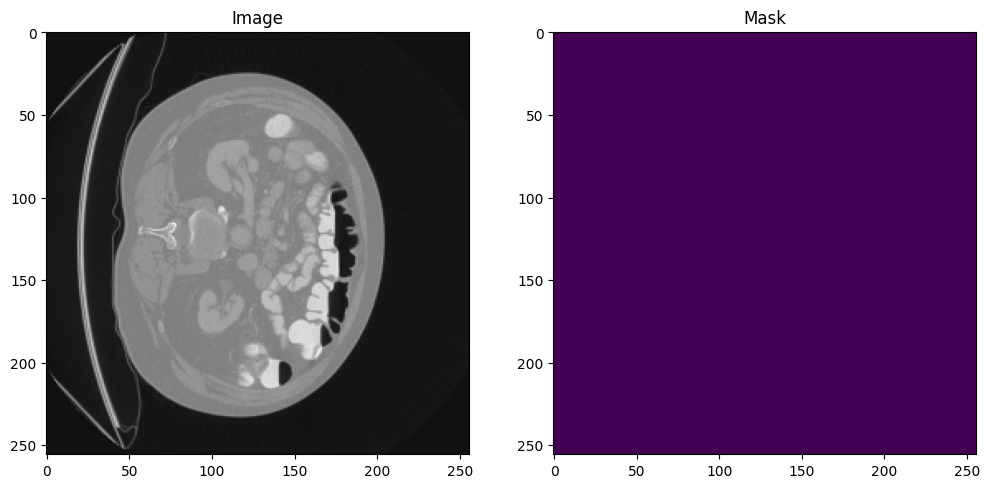

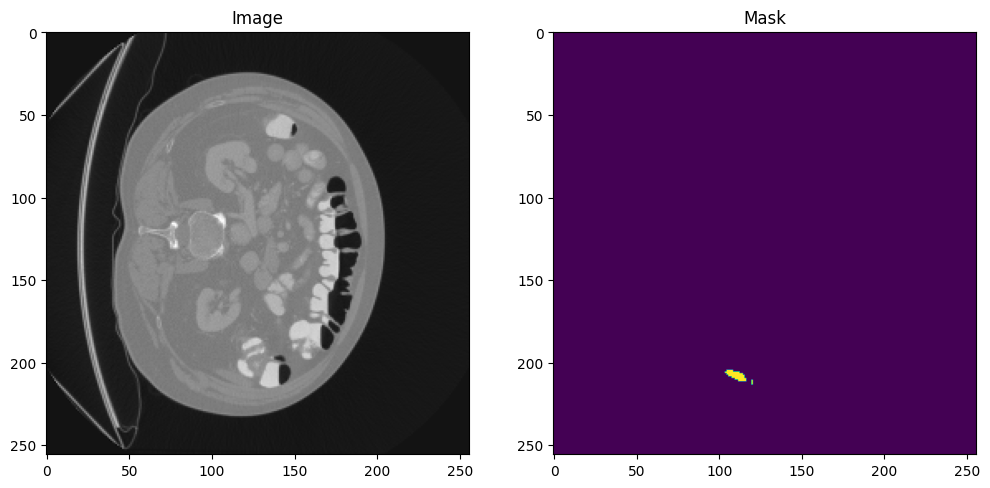

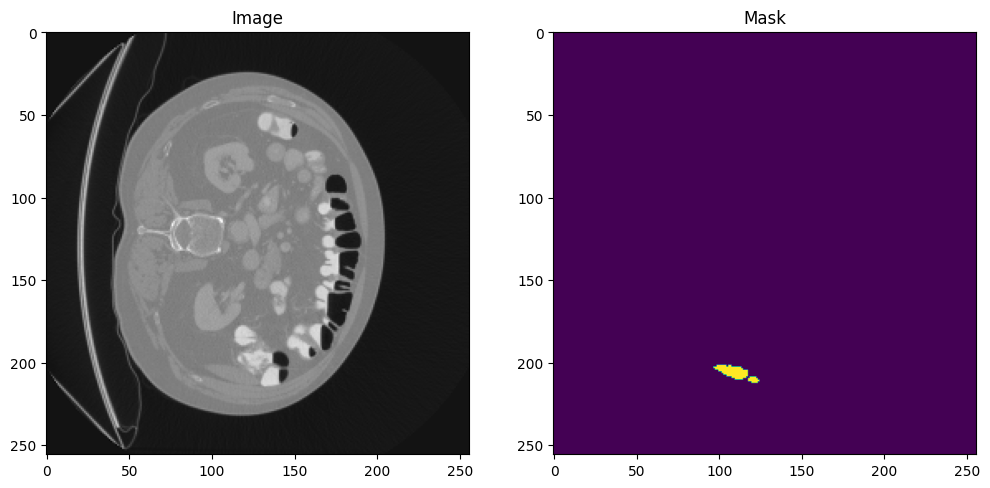

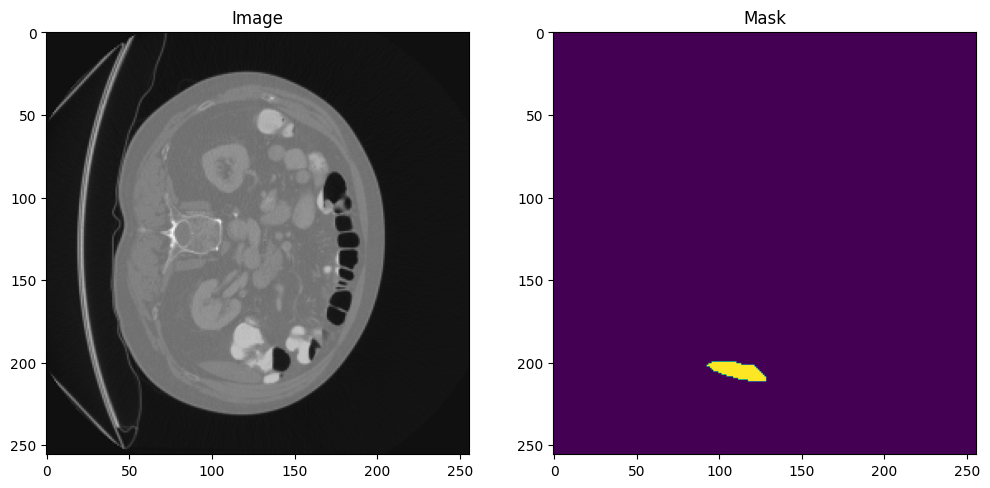

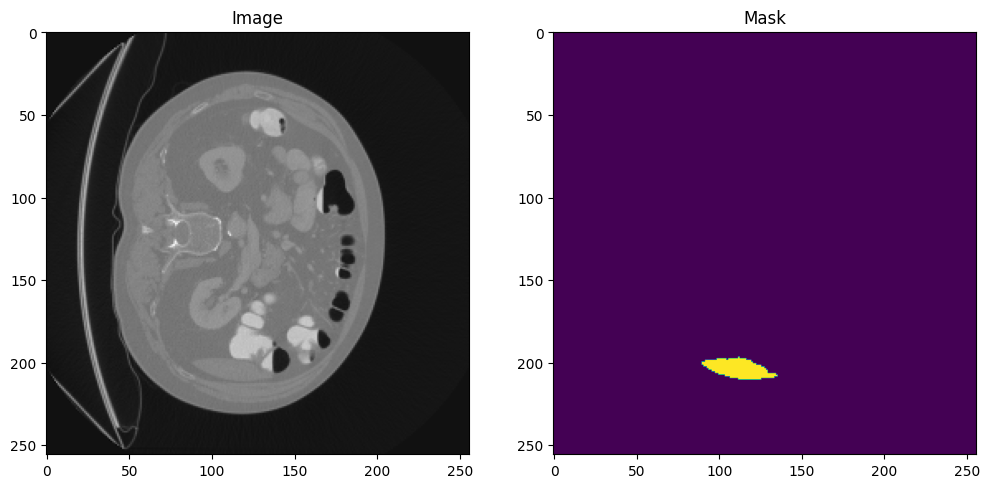

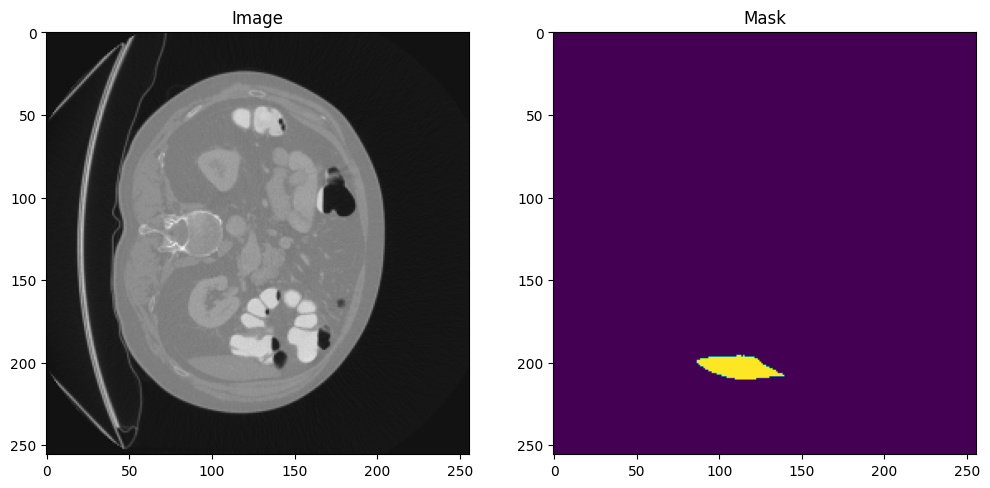

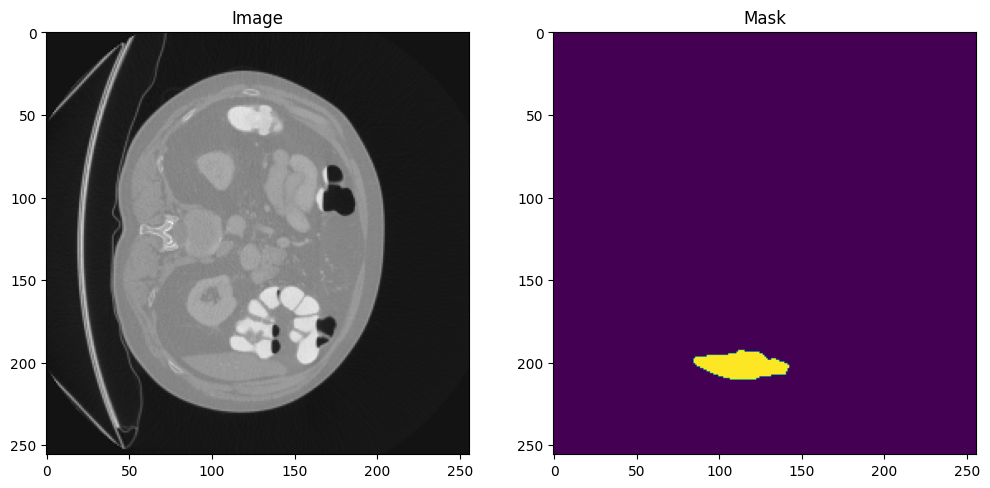

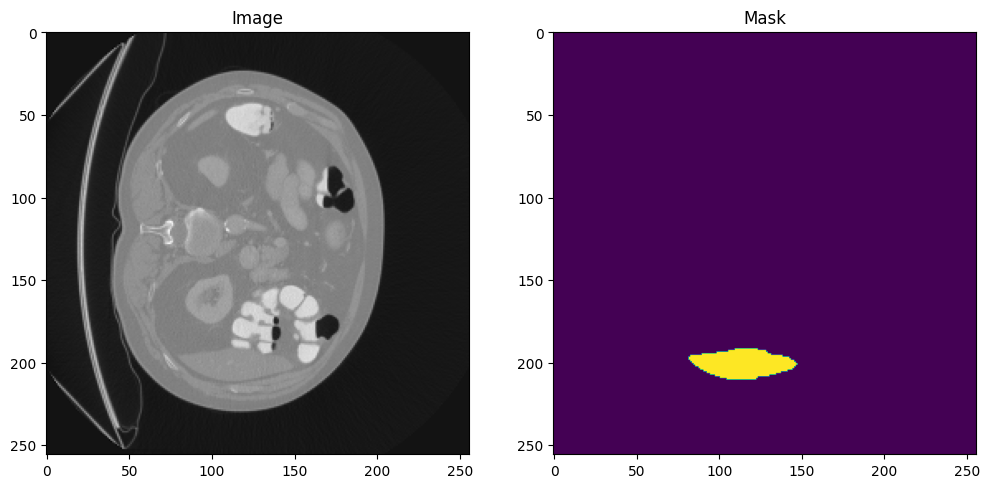

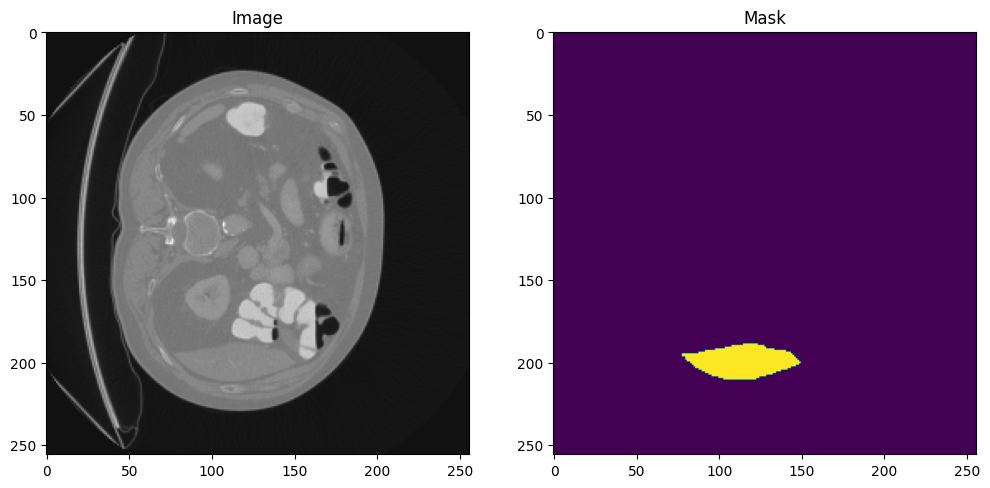

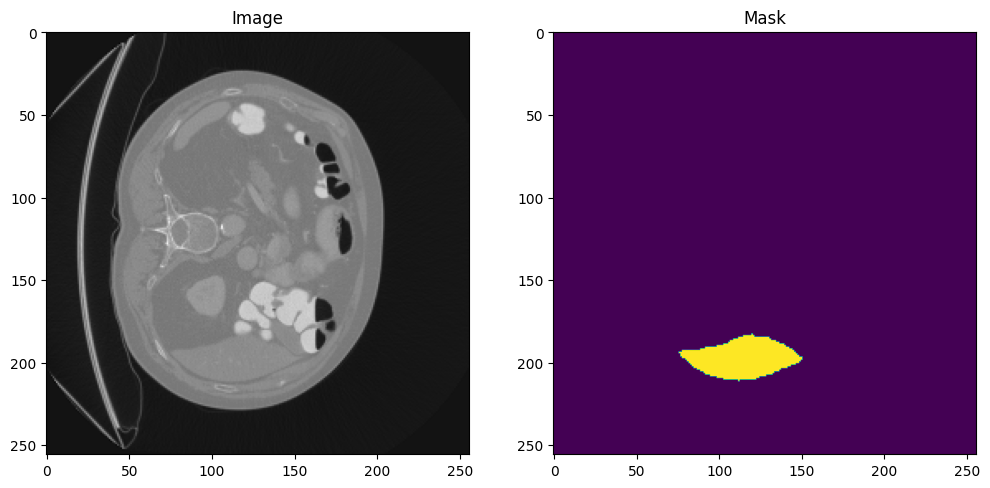

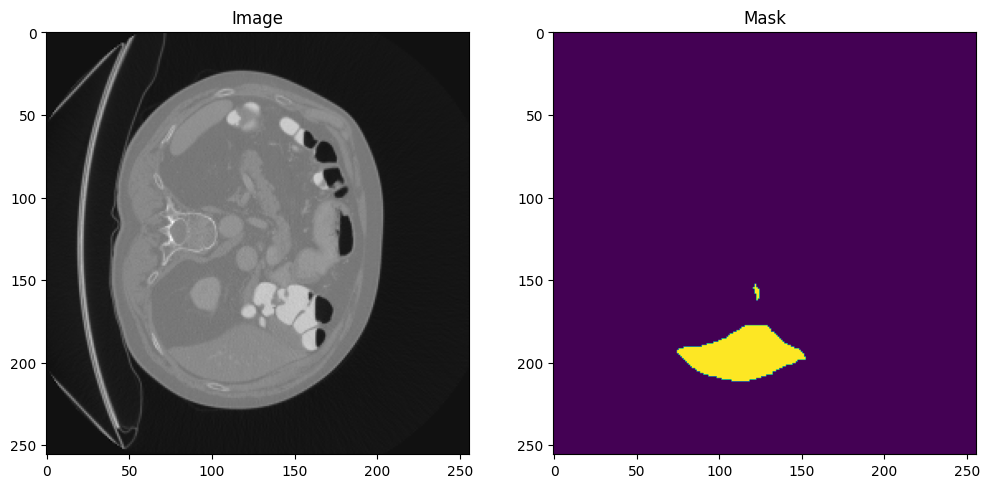

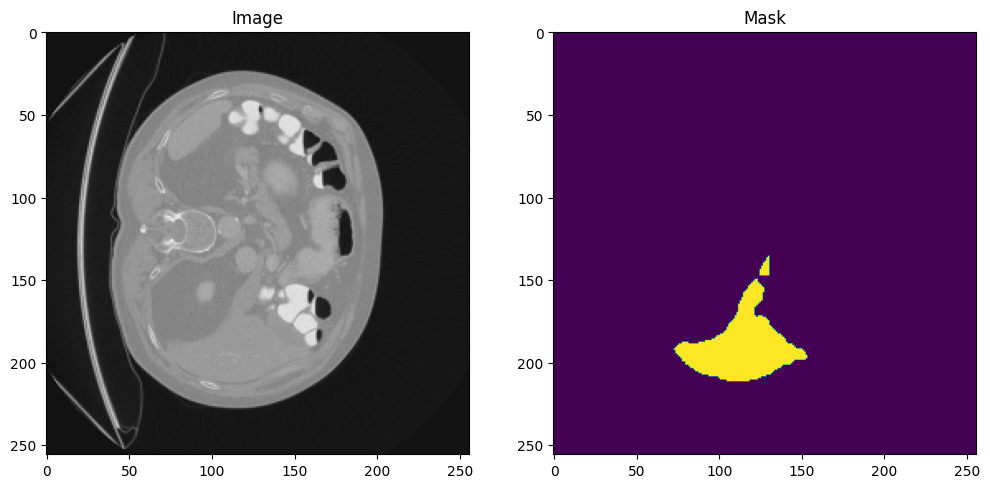

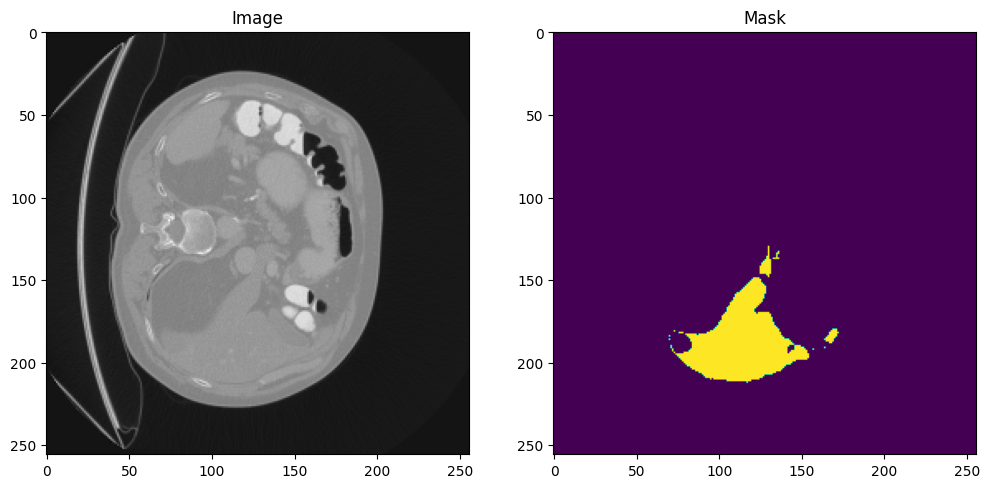

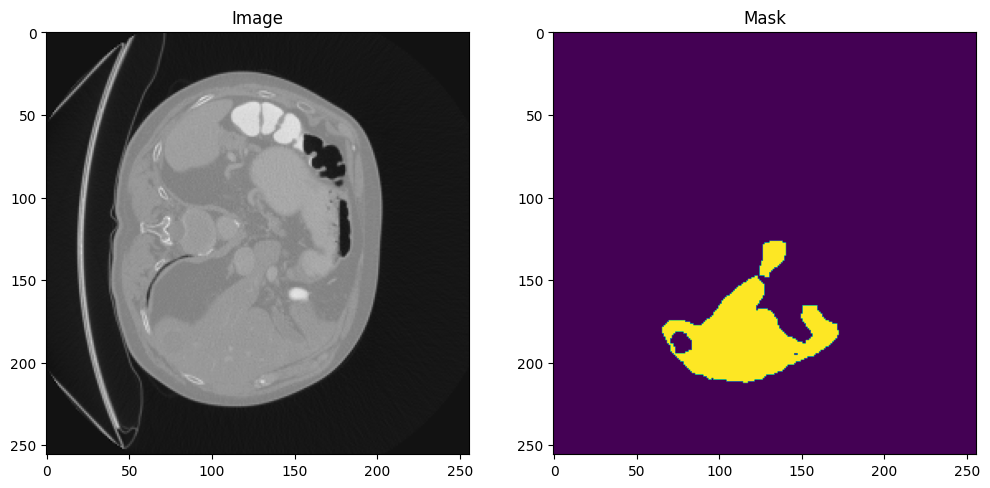

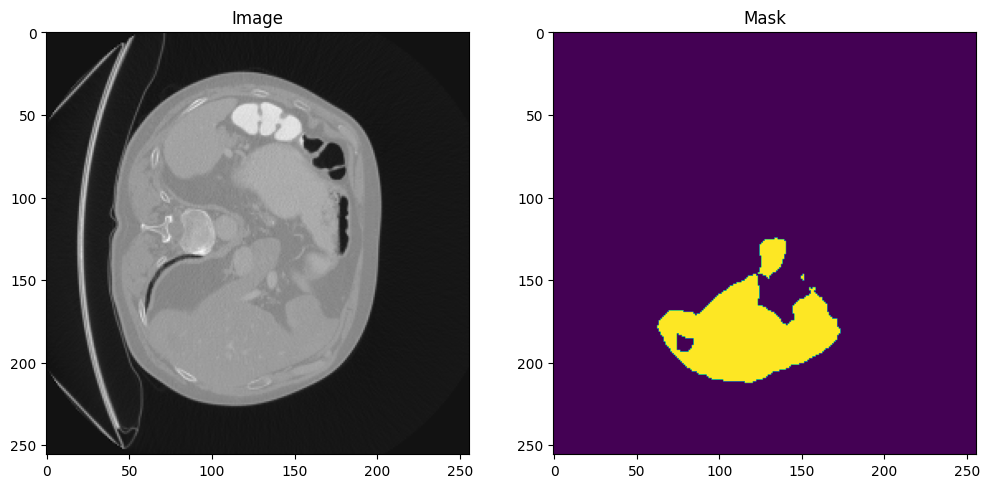

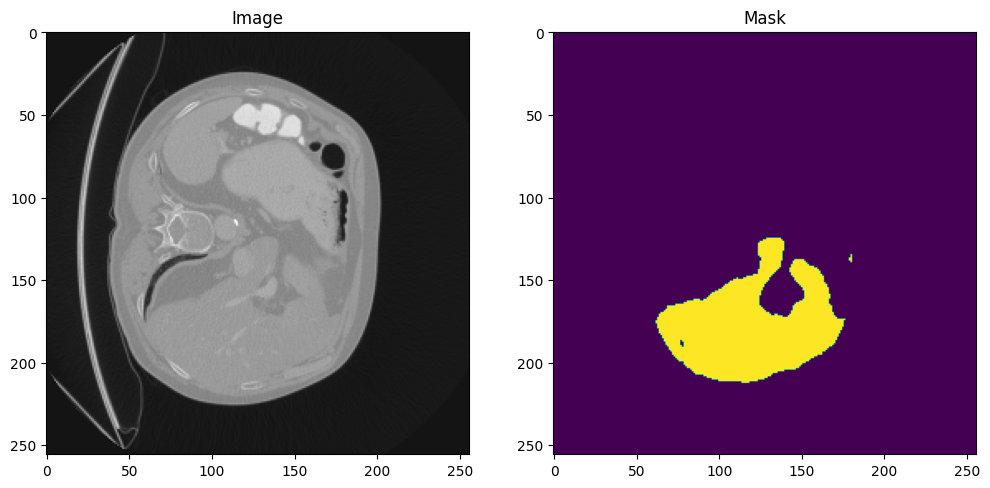

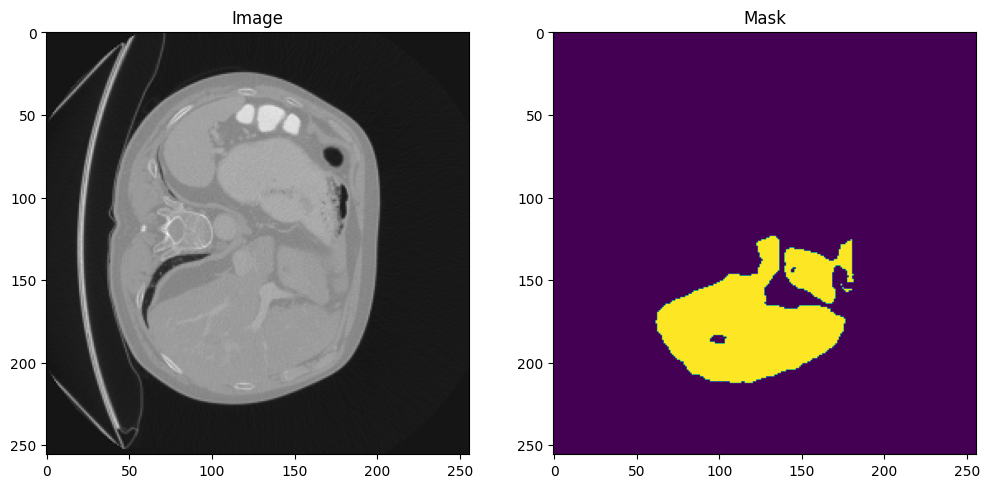

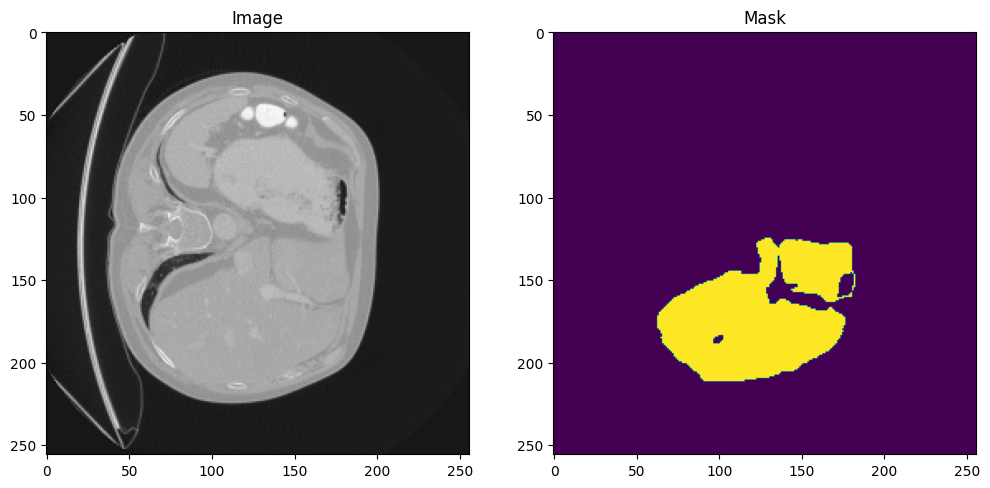

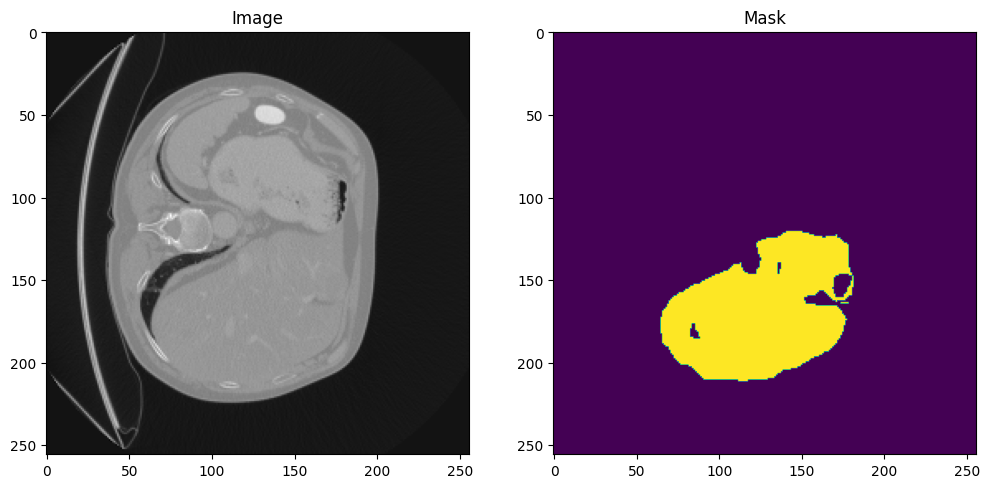

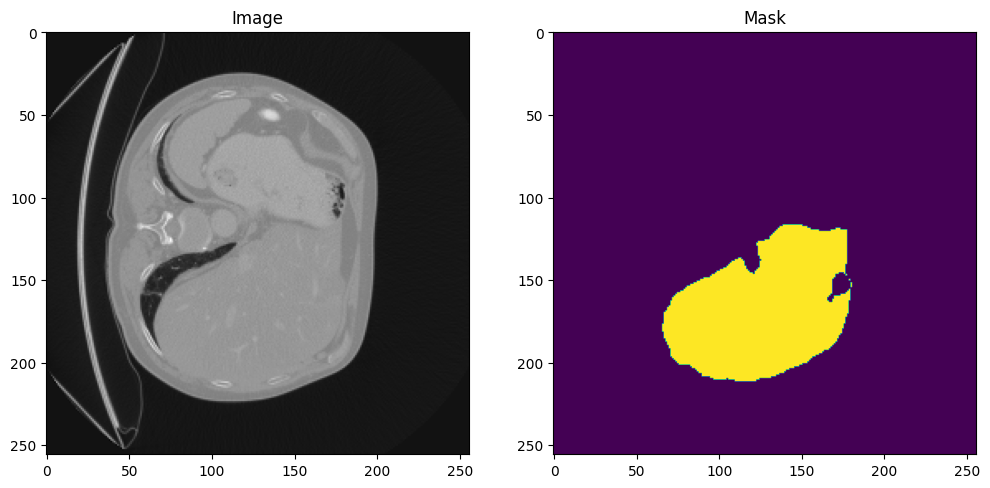

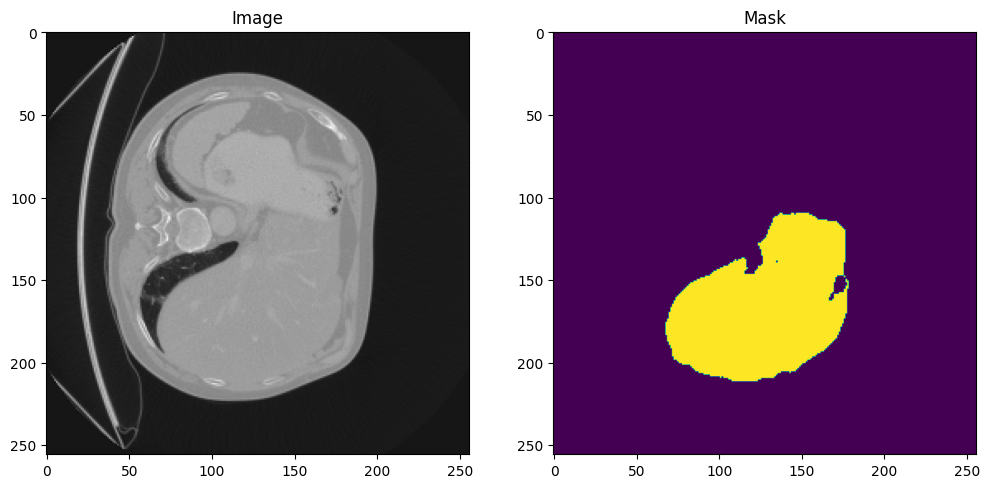

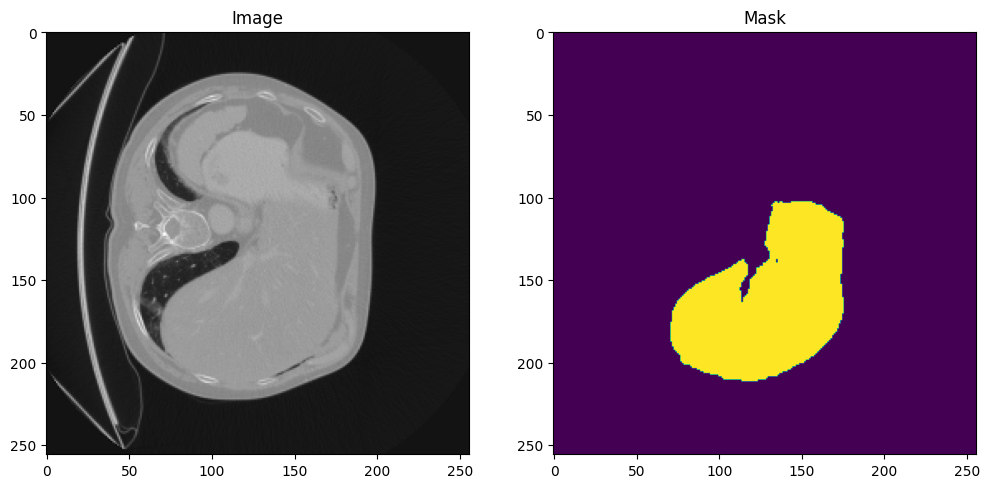

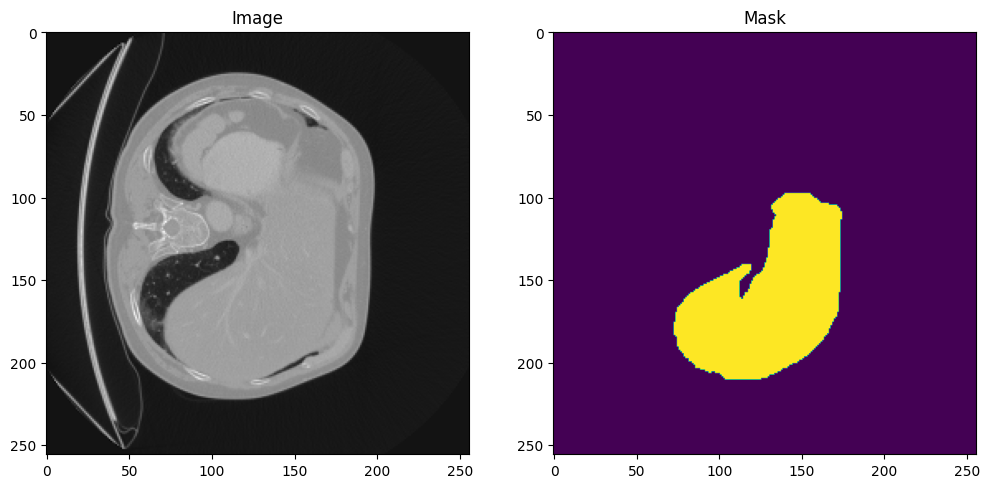

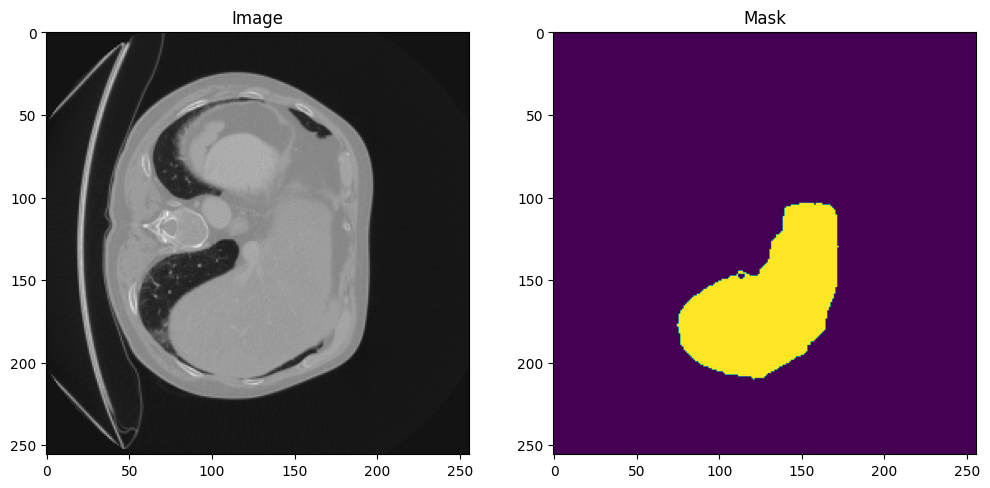

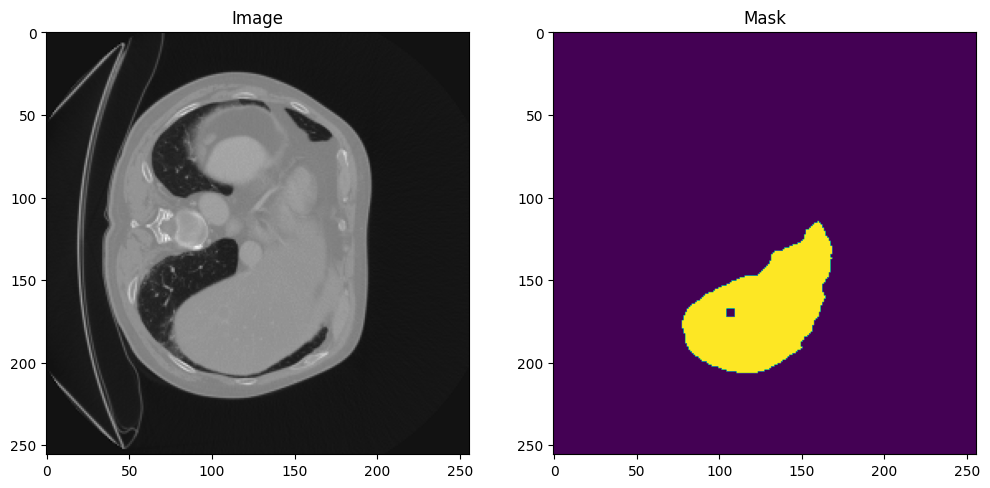

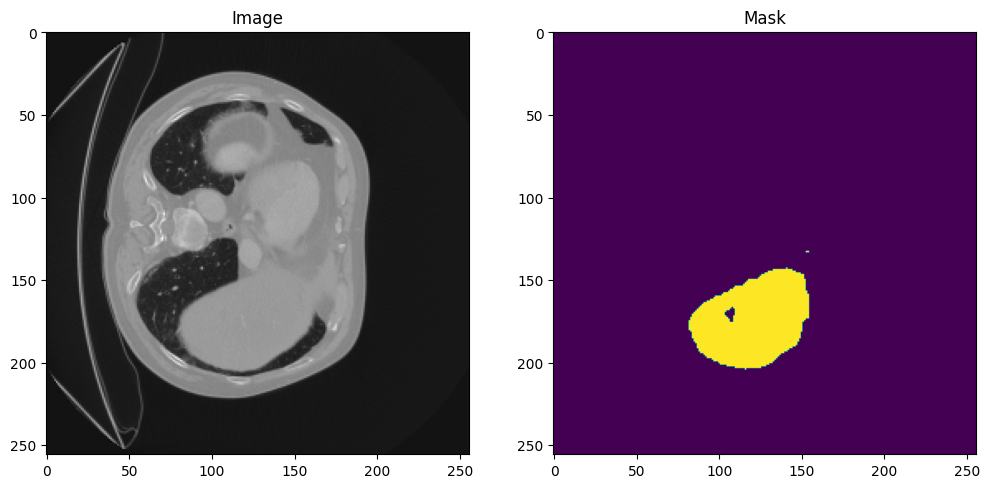

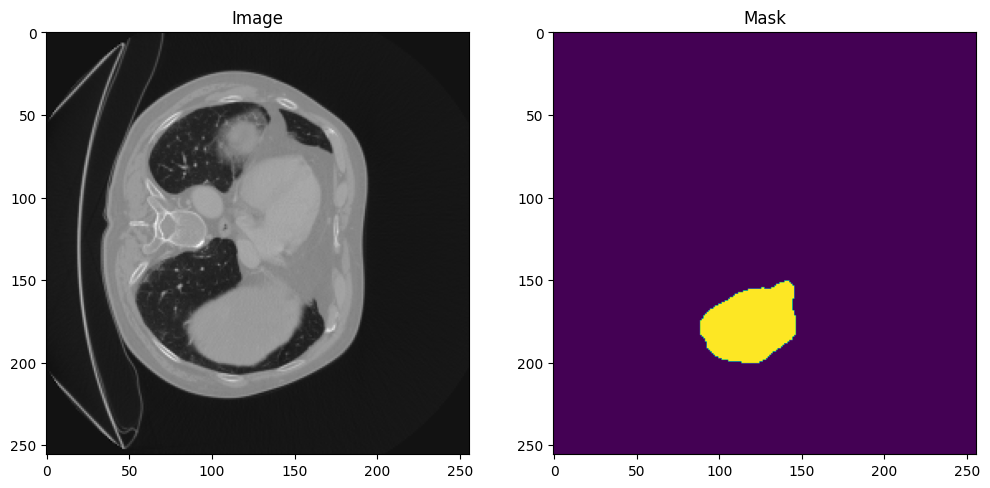

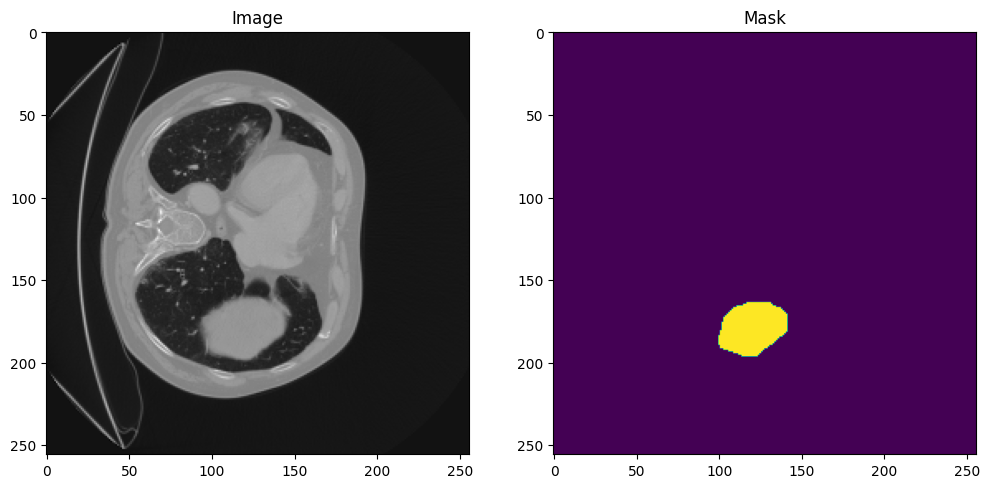

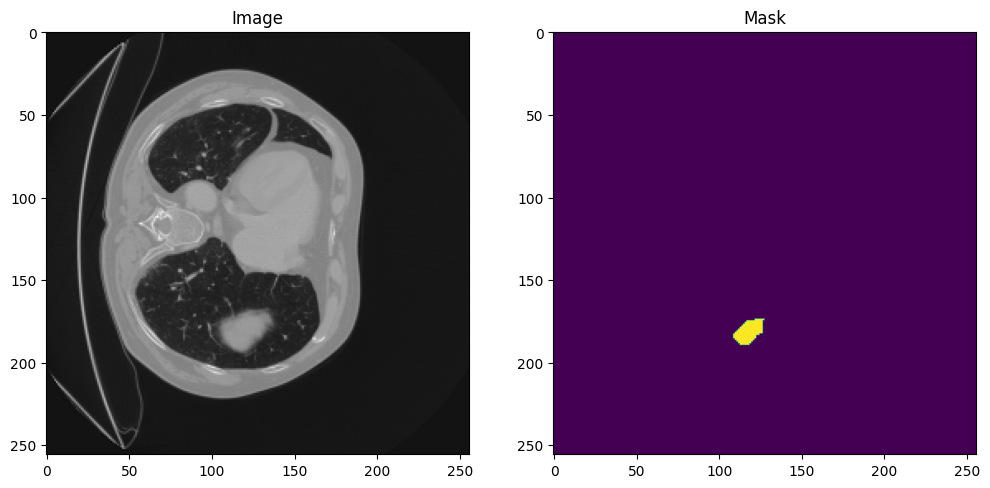

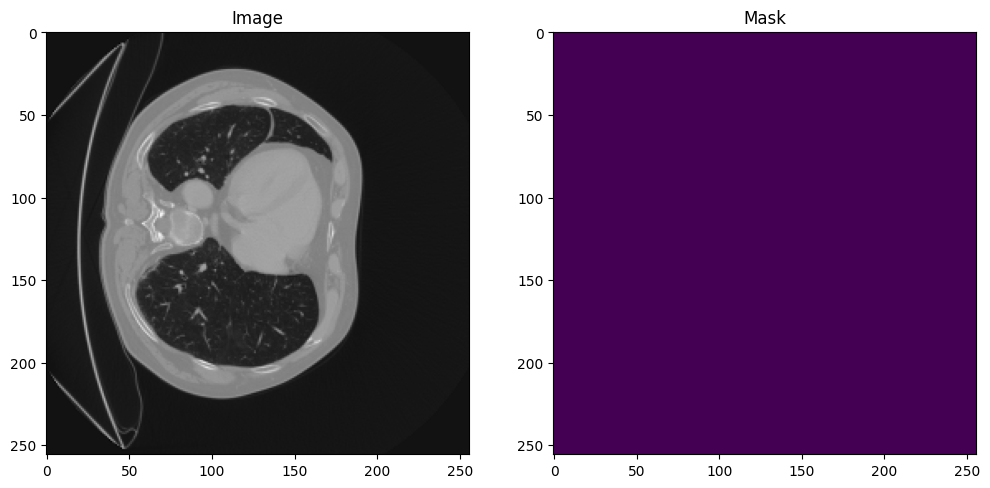

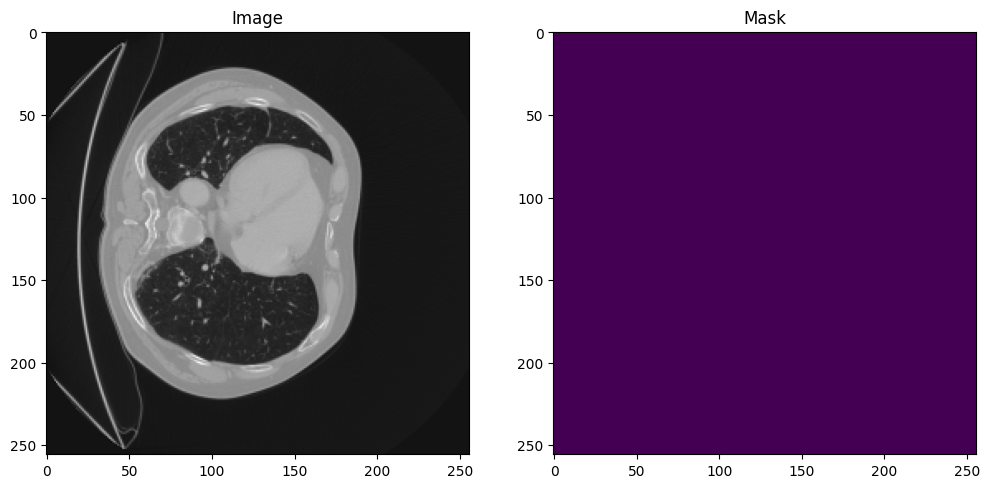

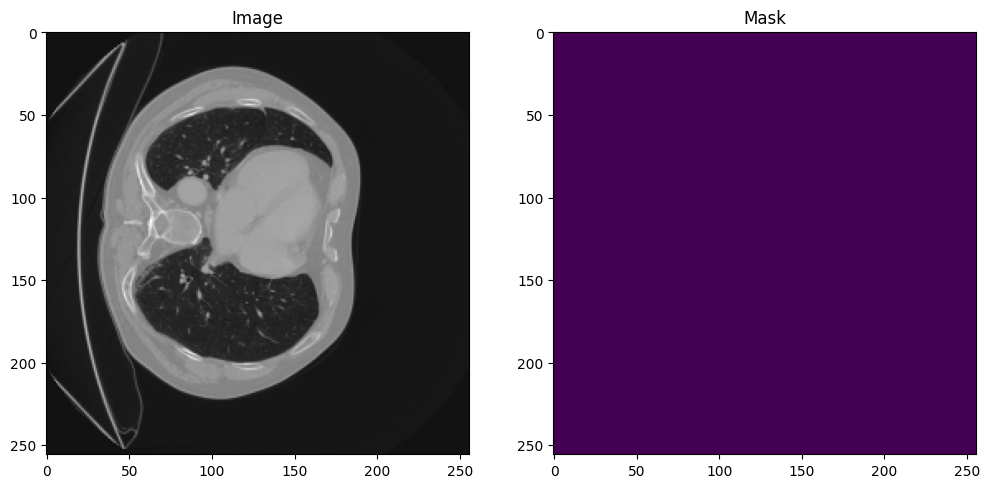

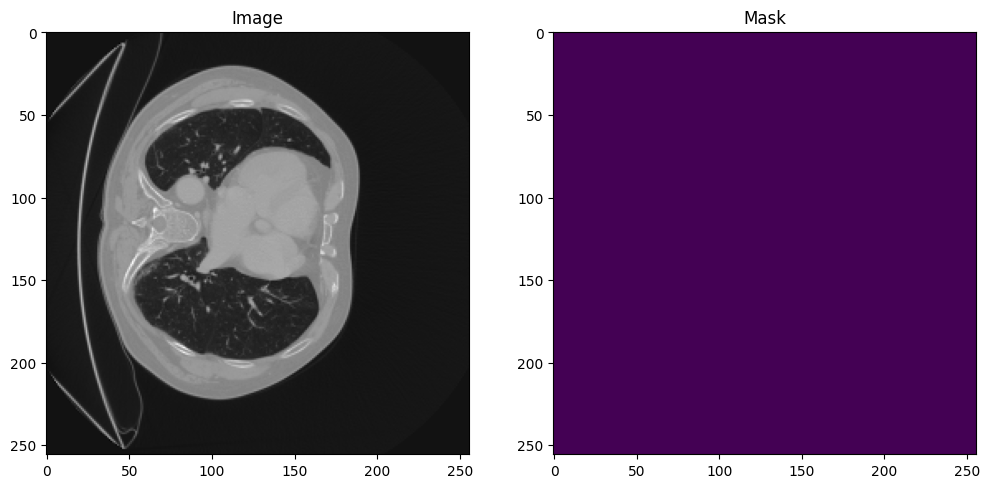

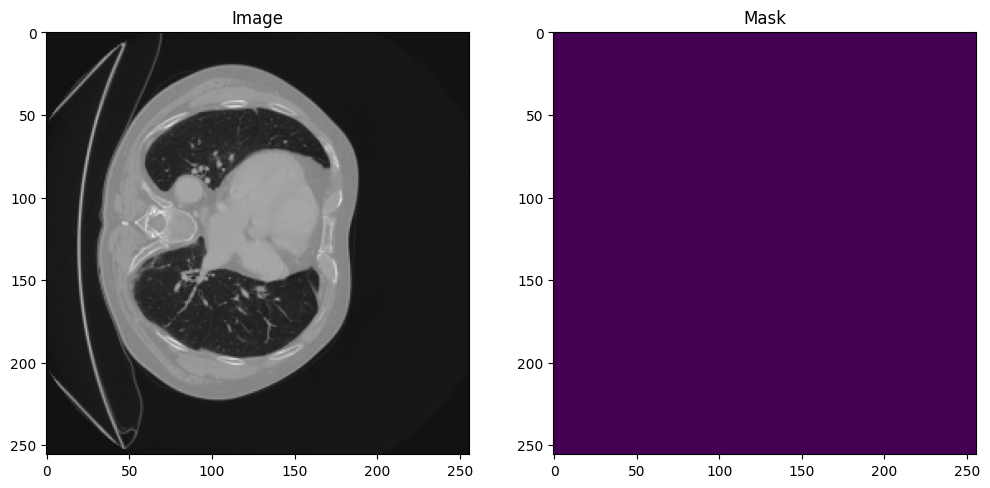

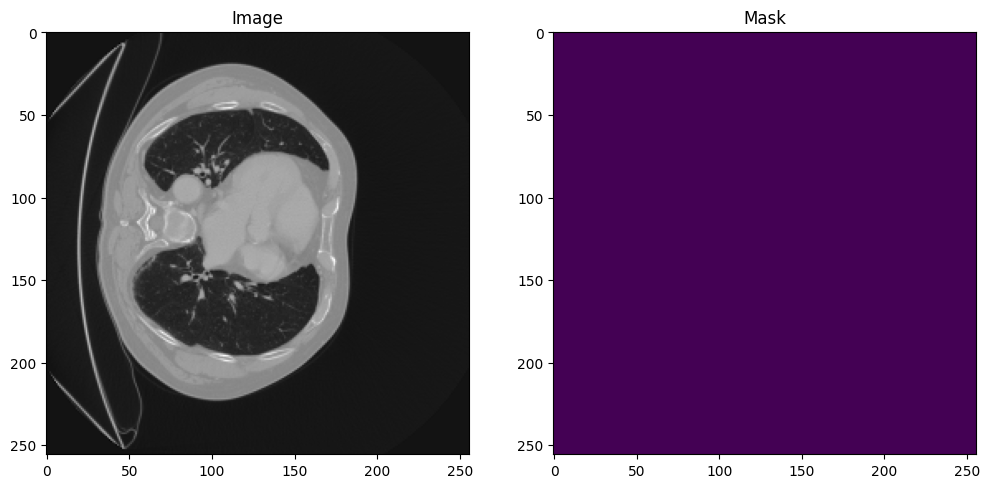

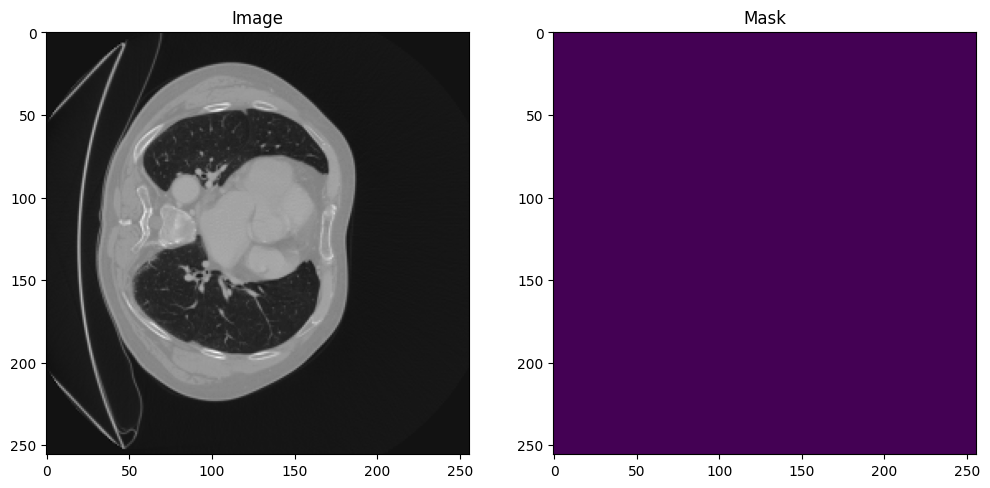

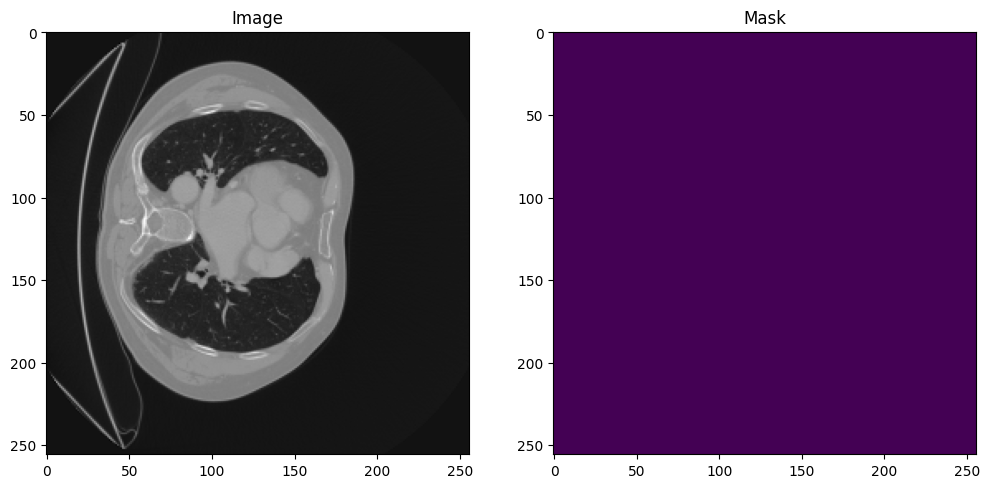

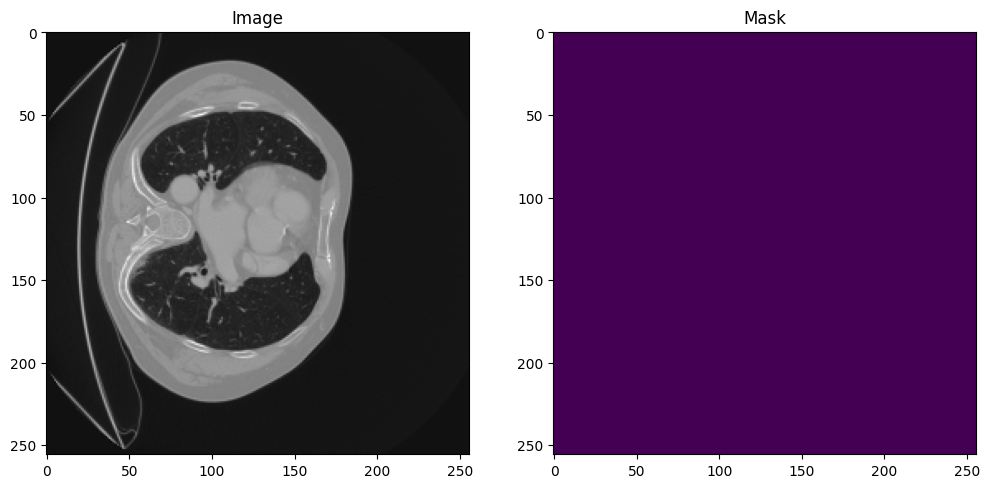

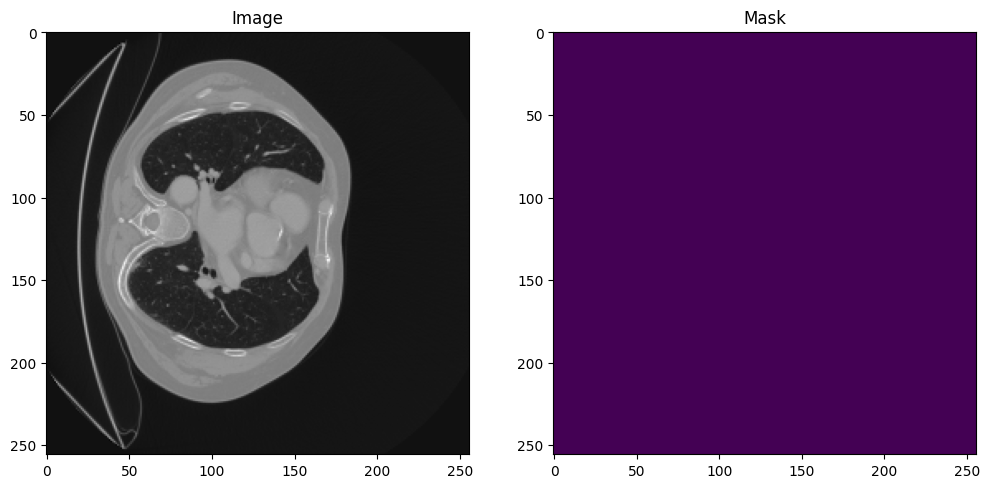

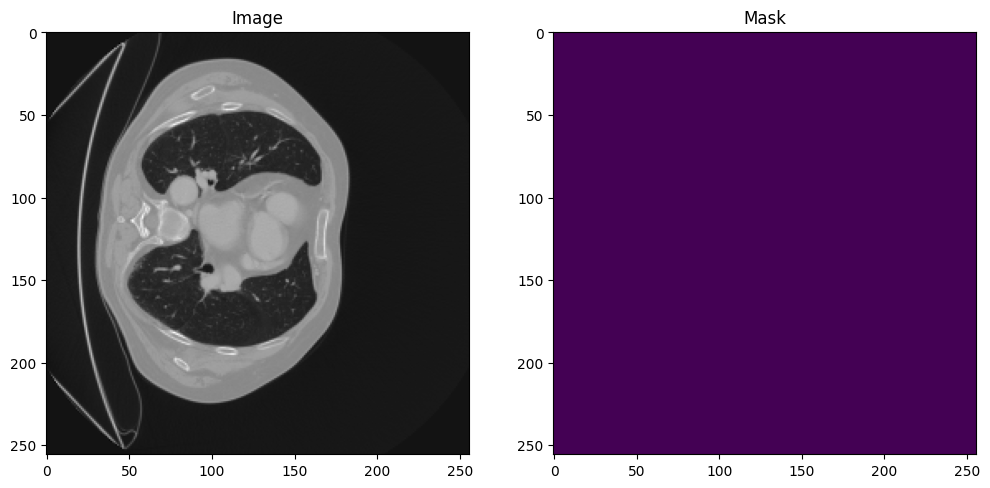

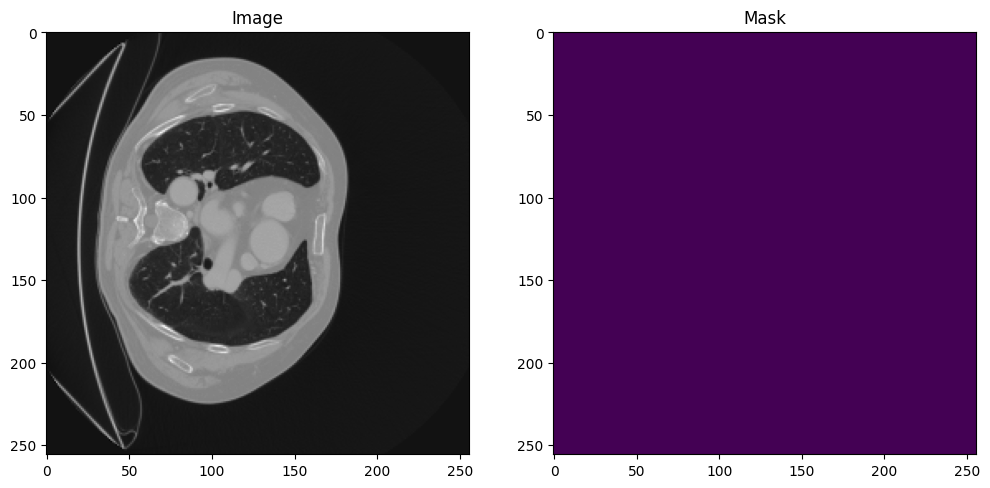

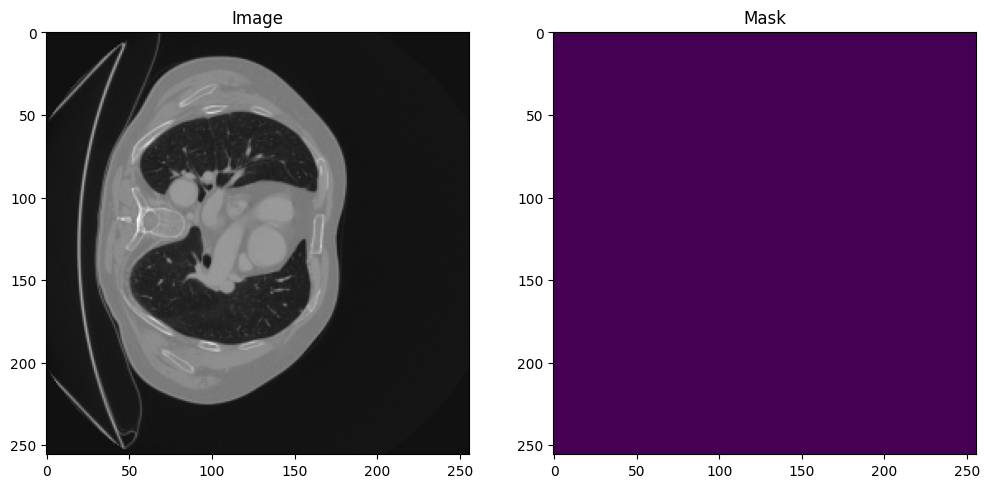

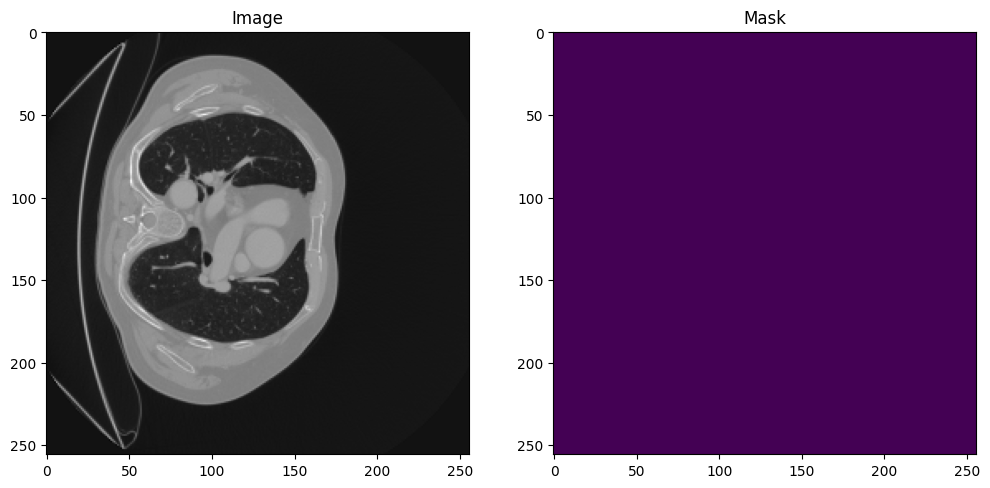

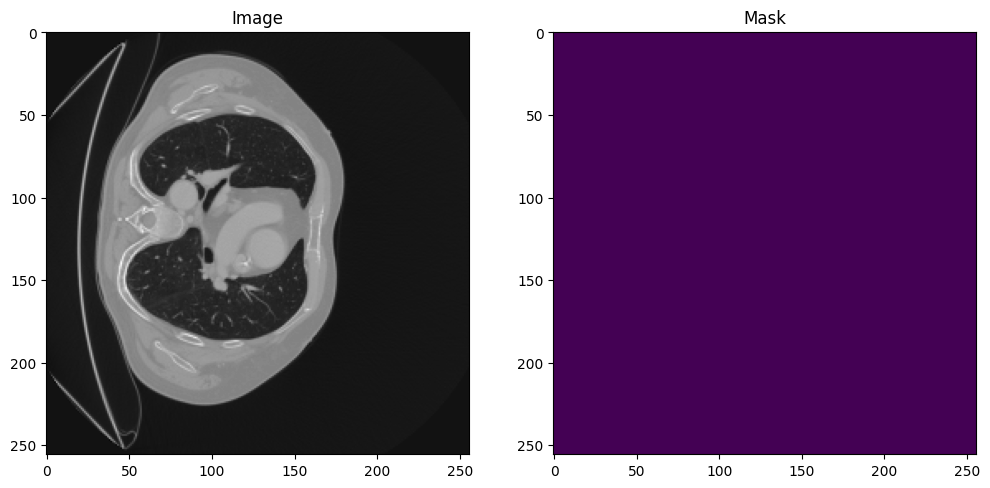

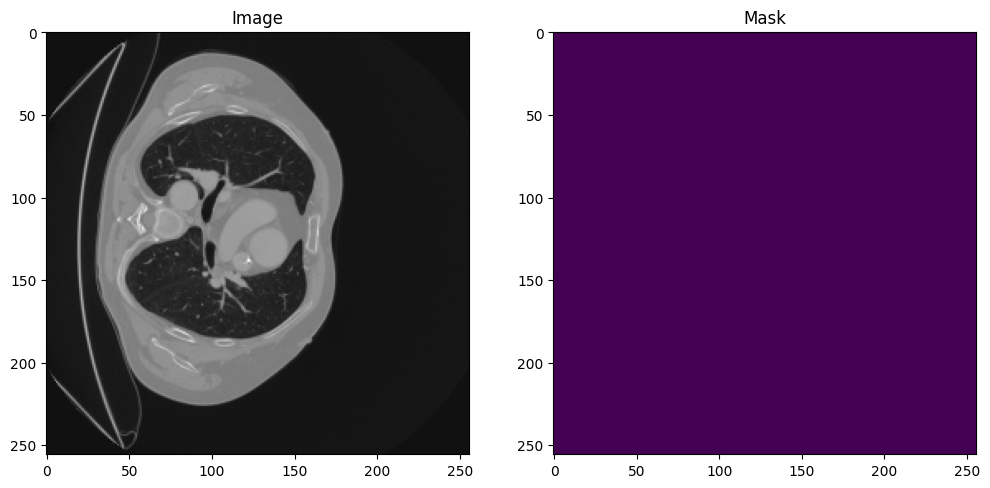

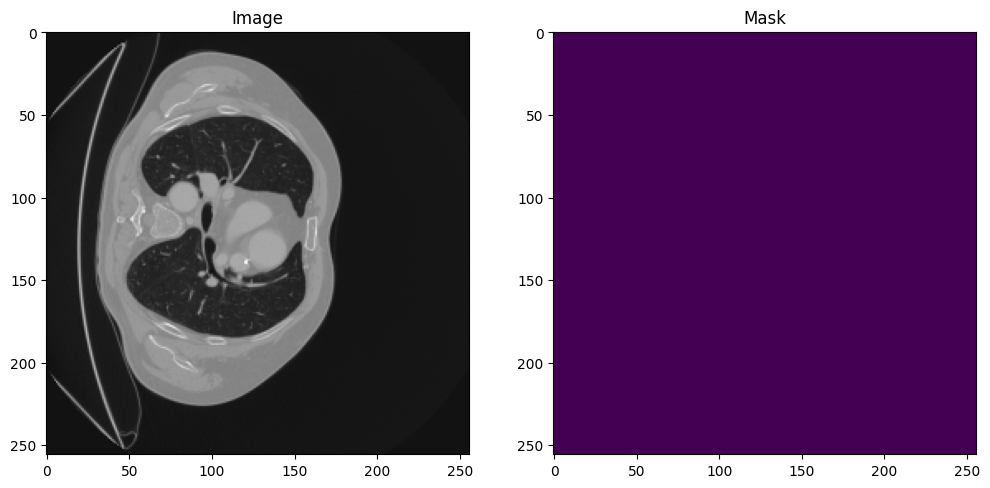

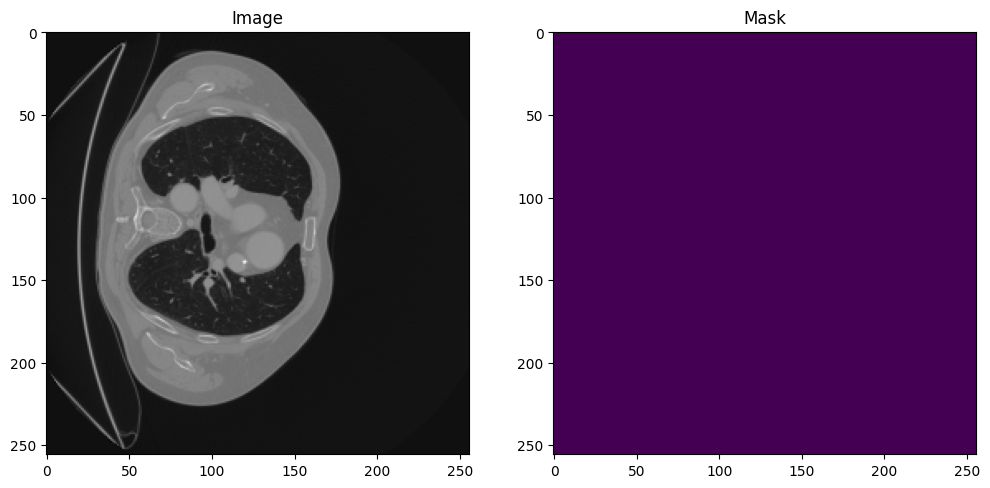

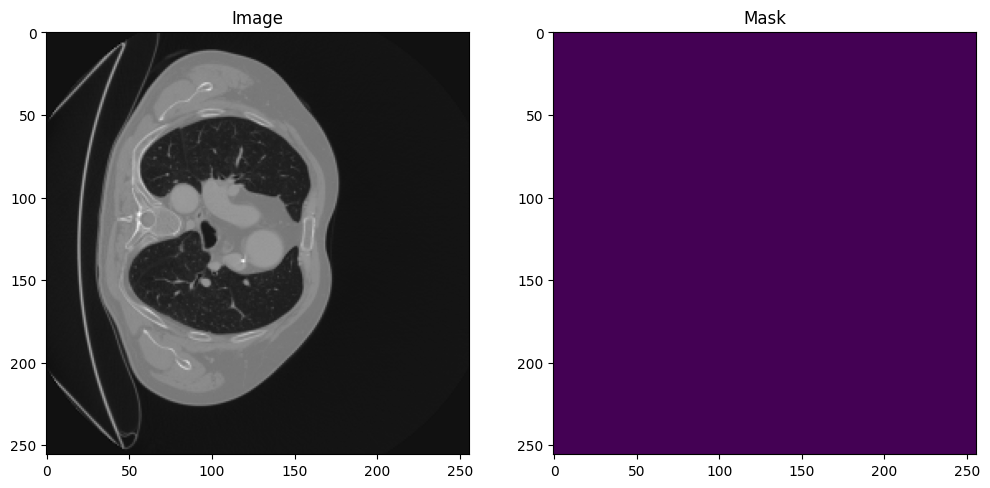

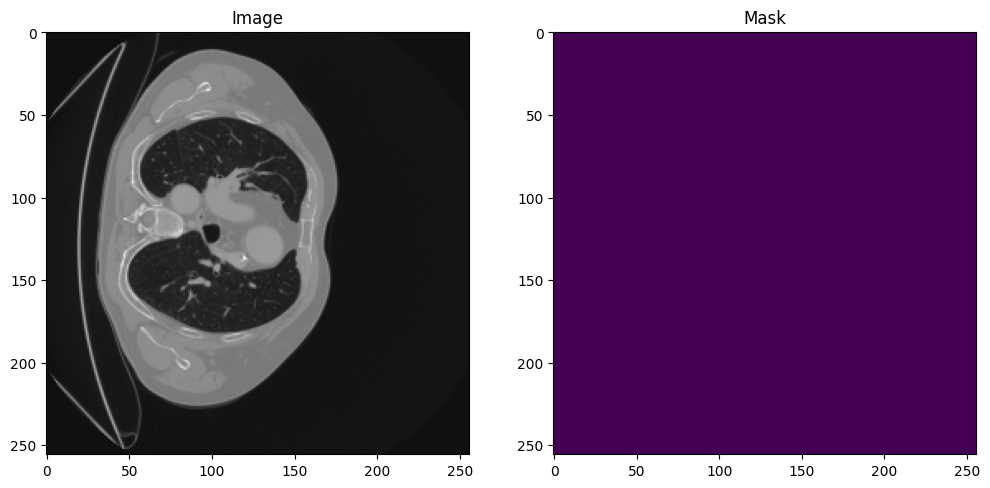

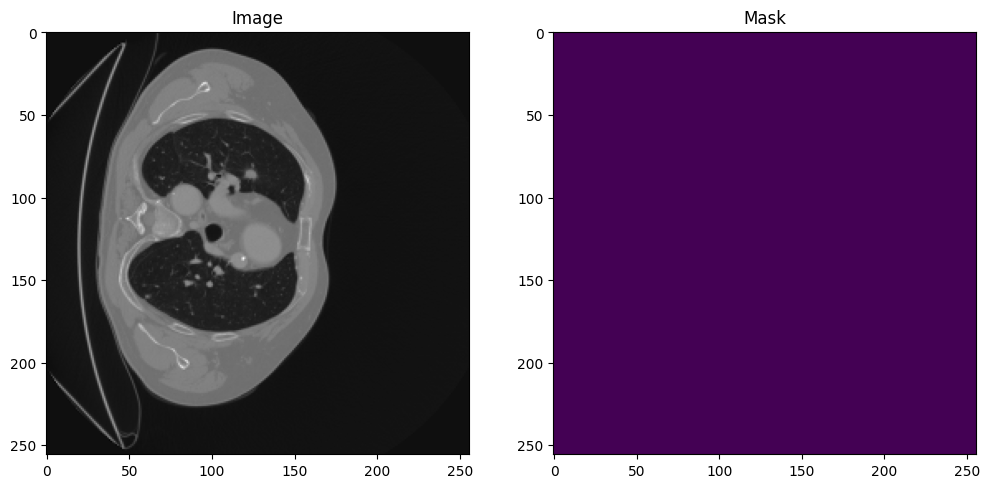

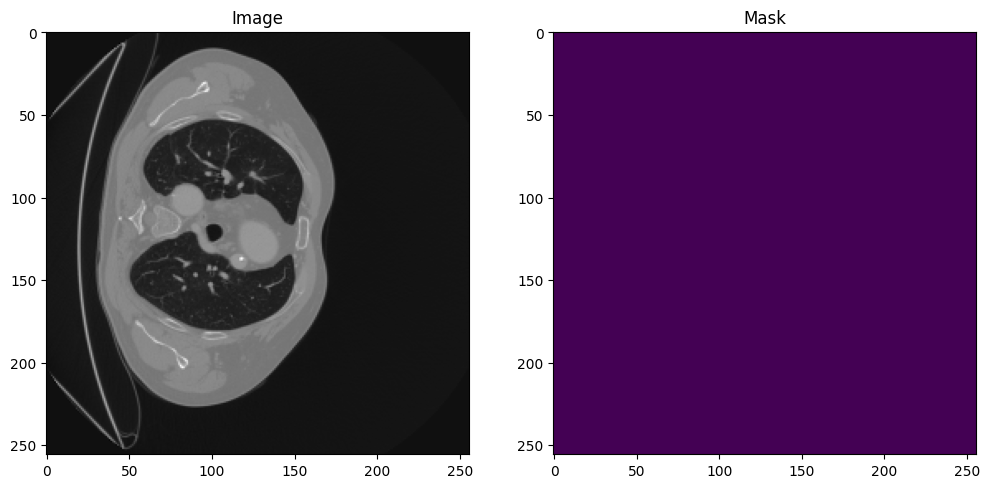

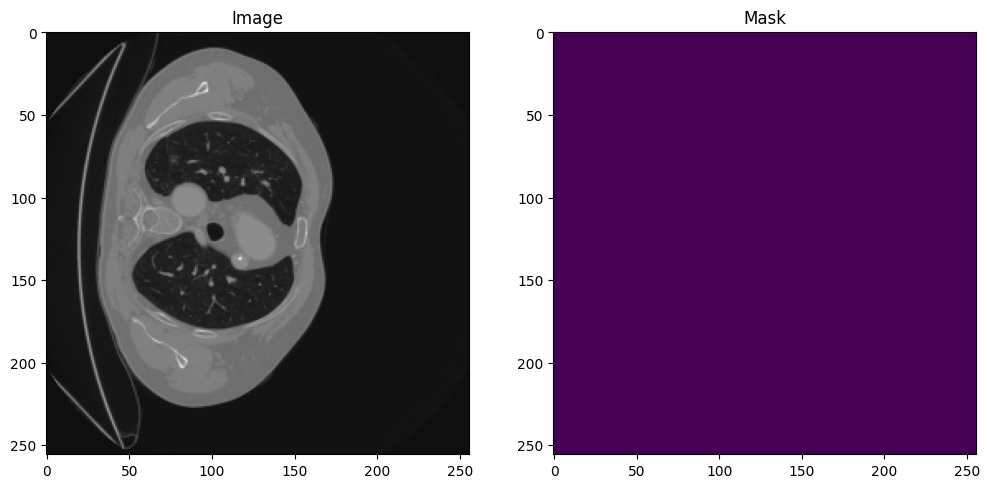

In [22]:
test_image = np.load(r'E:\Task03_Liver\ML_Liver\splitted\train\images\image_5.npy')
test_mask = np.load(r'E:\Task03_Liver\ML_Liver\splitted\train\masks\mask_5.npy')
print(test_image.shape)
print(test_mask.shape)

n_slice=random.randint(0, test_image.shape[2])
for idx in range(0, len(test_image), 5):
    plot_xy(test_image, test_mask[:,:,:,1], idx)

In [60]:
import os

train_img_dir = r"E:\Task03_Liver\ML_Liver\splitted\train\images\\"
train_mask_dir = r"E:\Task03_Liver\ML_Liver\splitted\train\masks\\"

val_img_dir = r"E:\Task03_Liver\ML_Liver\splitted\val\images_val\\"
val_mask_dir = r"E:\Task03_Liver\ML_Liver\splitted\val\masks_val\\"

train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list = os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)


In [ ]:
def shape_check(img_dir, train_img_list):
    # shape = ""
    for image_name in train_img_list:
        image = np.load(img_dir+image_name)
        print(image.shape)
        # if image.shape!=shape: print(image.shape)
        # shape = image.shape

shape_check(train_img_dir, train_img_list)

# temp_image_shape=test_image.shape
# test_mask_shape=test_mask.shape

In [67]:
def unique_mask(mask_dir, mask_list):
    for mask_name in mask_list:
        mask = np.load(mask_dir + mask_name)
        print(np.unique(mask))

unique_mask(train_mask_dir, train_mask_list)
# print("\n\n\n\n")
# unique_mask(val_mask_dir, val_mask_list)

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


In [64]:
z_20 = [75, 123, 455, 466, 501, 517, 518, 534, 537, 541, 541, 547, 549, 565, 574, 588, 605, 689, 826, 841, 845]

z_size = [74, 75, 86, 89, 91, 93, 94, 94, 96, 104, 105, 107, 111, 113, 119, 121, 122, 122, 123, 124, 124, 125, 129, 132, 135, 139, 147, 151, 155, 165, 168, 172, 188, 192, 193, 198, 200, 212, 216, 217, 225, 227, 230, 237, 239, 240, 244, 244, 245, 247, 254, 260, 266, 276, 333, 338, 343, 366, 391, 401, 407, 410, 422, 424, 427, 432, 437, 455, 461, 463, 466, 501, 513, 517, 518, 519, 534, 537, 541, 541, 547, 549, 565, 574, 588, 601, 605, 624, 629, 630, 645, 647, 654, 668, 671, 677, 683, 683, 685, 689, 696, 722, 733, 751, 751, 751, 756, 761, 766, 771, 771, 781, 811, 816, 826, 836, 836, 836, 841, 841, 845, 846, 846, 856, 861, 871, 896, 908, 917, 986, 987]

z_hist = {"<64": 0,
          "<128":0,
          "<256":0,
          "inf":0}

for z in z_20:
    if z < 64:
        z_hist["<64"] += 1
    elif z < 128:
        z_hist["<128"] += 1
    elif z < 256:
        z_hist["<256"] += 1
    else:
        z_hist["inf"] += 1

print(z_hist)

{'<64': 0, '<128': 2, '<256': 0, 'inf': 19}


In [ ]:
def resize_interpolate(image_3d):
    temp_3d = np.full(image_3d.shape, 0, dtype=int)
    for idx in range(image_3d.shape[0]):
        # print(idx)
        temp_2d = image_3d[idx,:,:]
        # print("b", temp_2d)
        # print(temp_2d.shape)
        temp_2d = cv2.resize(temp_2d, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
        temp_3d[idx,:,:] = temp_2d
    return temp_3d

a = np.array([[[1, 2, 3, 4, 5],
               [6, 7, 8, 9, 10],
               [11, 12, 13, 14, 15],
               [16, 17, 18, 19, 20]],
              [[21, 22, 23, 24, 25],
               [26, 27, 28, 29, 30],
               [31, 32, 33, 34, 35],
               [36, 37, 38, 39, 40]],
              [[41, 42, 43, 44, 45],
               [46, 47, 48, 49, 50],
               [51, 52, 53, 54, 55],
               [56, 57, 58, 59, 60]]])

print(a.shape)
a = resize_interpolate(a)
print("a after transformation ", a)

# c = np.full(a.shape, 0, dtype=int)
# for idx in range(a.shape[0]):
#     print(idx)
#     b = a[idx,:,:]
#     print("b", b)
#     print(b.shape)
#     c[idx,:,:] = b
#     # c = (b if idx==0 else np.concatenate((c, b), axis=0))
#
# print("c ", c)
# print(c.shape)